# Simulation of Lévy-driven OU processes 
### Financial Engineering AY 2023-2024
### Group 4a - Catelli Andrea, Marchetto Erica, Urso Giovanni

##### [1] Baviera & Manzoni, 2024, "Fast and General Simulation of L ́evy-driven OU processes for Energy Derivatives"

##### [2] Longstaff & Schwartz, 2001, "Valuing American Options by Simulation: A Simple Least-Squares Approach"

##### [3] Sabino, 2022, "Pricing Energy Derivatives in Markets Driven by Tempered Stable and CGMY Processes of Ornstein–Uhlenbeck Type"

##### [4] Sabino & Cufaro Petroni, 2022, "Fast simulation of tempered stable ornstein–uhlenbeck processes"

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import time
import Cumulants
import ExactDecomposition
import FastGeneralMonteCarlo
import Pricing
import ExtraTools

#### Model Parameters

In [49]:
x0 = 0
b = 0.1
beta_p = 2.5
beta_n = 3.5
c_p = 0.5
c_n = 1
gamma_c = 0

#### Flags

In [50]:
flag_OU_TS_FA = 1
flag_TS_OU = 2
flag_OU_TS_FV = 3

In [51]:
flag_ED = 1
flag_FGMC = 2

#### Simulation Parameters

In [52]:
T = 1/12
Nsim = 10000000
M = 1

 ## TS-OU and OU-TS: exact simulation


 ### OU-TS Finite Activity

In [53]:
alpha = -1

In [54]:
X_OU_TS_FA_ED, theorCumulantsT, simCumulantsT, theorCumulants_dt, simCumulants_dt, logFwd_OU_TS_FA_ED = ExactDecomposition.sim_OU_TS_FinAct_ED(
    x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, Nsim)

#### Cumulants

In [55]:
Cumulants.printCumulants(theorCumulantsT, simCumulantsT, T)
Cumulants.printCumulants(theorCumulants_dt, simCumulants_dt, T/M)


 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.03834
Statistical cumulants order 2 = 9.03555
Statistical cumulants order 3 = 2.97653
Statistical cumulants order 4 = 13.37586

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 9.14419
Theoretical cumulants order 3 = 3.03002
Theoretical cumulants order 4 = 13.81638

 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.03834
Statistical cumulants order 2 = 9.03555
Statistical cumulants order 3 = 2.97653
Statistical cumulants order 4 = 13.37586

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 9.14419
Theoretical cumulants order 3 = 3.03002
Theoretical cumulants order 4 = 13.81638


### OU-TS Finite Variation

In [56]:
alpha = 0.5

In [57]:
X_OU_TS_FV_ED, theorCumulantsT, simCumulantsT, theorCumulants_dt, simCumulants_dt, logFwd_OU_TS_FV_ED = ExactDecomposition.sim_OU_TS_FinVar_ED(
    x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, Nsim)

#### Cumulants

In [58]:
Cumulants.printCumulants(theorCumulantsT, simCumulantsT, T)
Cumulants.printCumulants(theorCumulants_dt, simCumulants_dt, T/M)


 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.02086
Statistical cumulants order 2 = 20.44051
Statistical cumulants order 3 = 0.71315
Statistical cumulants order 4 = 8.81928

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 20.44953
Theoretical cumulants order 3 = 0.76167
Theoretical cumulants order 4 = 8.90838

 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.02086
Statistical cumulants order 2 = 20.44051
Statistical cumulants order 3 = 0.71315
Statistical cumulants order 4 = 8.81928

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 20.44953
Theoretical cumulants order 3 = 0.76167
Theoretical cumulants order 4 = 8.90838


### TS-OU Finite Variation

In [59]:
alpha = 0.5

In [60]:
X_TS_OU_FV_ED, theorCumulantsT, simCumulantsT, theorCumulants_dt, simCumulants_dt, logFwd_TS_OU_FV_ED = ExactDecomposition.sim_TS_OU_FinVar_ED(
    x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, Nsim)

#### Cumulants

In [61]:
Cumulants.printCumulants(theorCumulantsT, simCumulantsT, T)
Cumulants.printCumulants(theorCumulants_dt, simCumulants_dt, T/M)


 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.02881
Statistical cumulants order 2 = 4.06230
Statistical cumulants order 3 = 0.15137
Statistical cumulants order 4 = 3.47990

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 4.08991
Theoretical cumulants order 3 = 0.22850
Theoretical cumulants order 4 = 3.56335

 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.02881
Statistical cumulants order 2 = 4.06230
Statistical cumulants order 3 = 0.15137
Statistical cumulants order 4 = 3.47990

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 4.08991
Theoretical cumulants order 3 = 0.22850
Theoretical cumulants order 4 = 3.56335


## 2a) Fast General Montecarlo Method Simulation

### OU-TS Finite Variation

In [62]:
M_fft = 16
scale = 1
alpha = 0.5

In [63]:
X_OU_TS_FV_FM, theorCumulantsT, simCumulantsT, theorCumulants_dt, simCumulants_dt, logFwd_OU_TS_FV_FM \
    = FastGeneralMonteCarlo.sim_OU_TS_FinVar_FGMC(
    x0, b, alpha, beta_p, beta_n, c_p, c_n, gamma_c, T, Nsim, M, M_fft, scale)

#### Cumulants

In [64]:
Cumulants.printCumulants(theorCumulantsT, simCumulantsT, T)
Cumulants.printCumulants(theorCumulants_dt, simCumulants_dt, T/M)


 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.00237
Statistical cumulants order 2 = 20.50788
Statistical cumulants order 3 = 0.78558
Statistical cumulants order 4 = 9.09081

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 20.44953
Theoretical cumulants order 3 = 0.76167
Theoretical cumulants order 4 = 8.90838

 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.00237
Statistical cumulants order 2 = 20.50788
Statistical cumulants order 3 = 0.78558
Statistical cumulants order 4 = 9.09081

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 20.44953
Theoretical cumulants order 3 = 0.76167
Theoretical cumulants order 4 = 8.90838


### TS-OU Finite Variation

In [65]:
M_fft = 24
scale = 1
alpha = 0.5

In [66]:
X_TS_OU_FV_FM, theorCumulantsT, simCumulantsT, theorCumulants_dt, simCumulants_dt, logFwd_TS_OU_FV_FM = (
    FastGeneralMonteCarlo.sim_TS_OU_FinVar_FGMC(
    x0, b, alpha, beta_p, beta_n, c_p, c_n, gamma_c, T, Nsim, M, M_fft, scale ) )

#### Cumulants

In [67]:
Cumulants.printCumulants(theorCumulantsT, simCumulantsT, T)
Cumulants.printCumulants(theorCumulants_dt, simCumulants_dt, T/M)


 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = 0.00083
Statistical cumulants order 2 = 4.10825
Statistical cumulants order 3 = 0.22817
Statistical cumulants order 4 = 3.55255

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 4.08991
Theoretical cumulants order 3 = 0.22850
Theoretical cumulants order 4 = 3.56335

 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = 0.00083
Statistical cumulants order 2 = 4.10825
Statistical cumulants order 3 = 0.22817
Statistical cumulants order 4 = 3.55255

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 4.08991
Theoretical cumulants order 3 = 0.22850
Theoretical cumulants order 4 = 3.56335


## 2b) Fast MC Simulation for Finite Activity

### OU-TS Finite Activity

In [68]:
M_fft = 16
scale = 1
alpha = -1

In [69]:
X_OU_TS_FA_FM, theorCumulantsT, simCumulantsT, theorCumulants_dt, simCumulants_dt, logFwd_OU_TS_FA_FM = (
    FastGeneralMonteCarlo.sim_OU_TS_FinAct_FGMC(
    x0, b, alpha, beta_p, beta_n, c_p, c_n, gamma_c, T, Nsim, M, M_fft, scale
))


#### Cumulants

In [70]:
Cumulants.printCumulants(theorCumulantsT, simCumulantsT, T)
Cumulants.printCumulants(theorCumulants_dt, simCumulants_dt, T/M)


 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.10084
Statistical cumulants order 2 = 9.15149
Statistical cumulants order 3 = 3.30249
Statistical cumulants order 4 = 15.25819

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 9.14419
Theoretical cumulants order 3 = 3.03002
Theoretical cumulants order 4 = 13.81638

 Statistical cumulants with T 0.08 : 
Statistical cumulants order 1 = -0.10084
Statistical cumulants order 2 = 9.15149
Statistical cumulants order 3 = 3.30249
Statistical cumulants order 4 = 15.25819

 Theoretical cumulants with delta t 0.08 : 
Theoretical cumulants order 1 = 0.00000
Theoretical cumulants order 2 = 9.14419
Theoretical cumulants order 3 = 3.03002
Theoretical cumulants order 4 = 13.81638


## 3a) Energy derivative pricing - EUROPEAN CALL

### OU-TS Finite Variation 

In [71]:
# Quantities of interest
T=1/12
M_fft = 16
S0 = 1
r = 0
alpha=0.5
scale=1
moneyness = np.linspace(-0.2, 0.2, 100) * np.sqrt(T)

#### Prices with Lewis formula

In [72]:
pricesLewis = Pricing.price_european_lewis_fft(S0, b, alpha, beta_p, beta_n, c_p, c_n, gamma_c, T, moneyness, r, flag_OU_TS_FV, M_fft)

#### Prices exact decomposition

In [73]:
prices_ED, SD_ED, conf_int_ED = Pricing.priceEuropean(x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, M_fft, Nsim, r, S0, moneyness, scale, flag_OU_TS_FV, flag_ED)

#### Prices with Fast General Monte Carlo

In [74]:
prices_FM, SD_FM, conf_int_FM = Pricing.priceEuropean(x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, M_fft, Nsim, r, S0, moneyness, scale, flag_OU_TS_FV, flag_FGMC)

#### Error computation

In [75]:
normInf_ED, RMSE_ED, MAPE_ED = ExtraTools.metricsComputation(pricesLewis, prices_ED)
print("Norm infinitity", normInf_ED)
print("Root Mean Square Error", RMSE_ED)
print("Mean Absolute Percentage Error", MAPE_ED)
normInf_FM, RMSE_FM, MAPE_FM = ExtraTools.metricsComputation(pricesLewis, prices_FM)
print("Norm infinitity", normInf_ED)
print("Root Mean Square Error", RMSE_ED)
print("Mean Absolute Percentage Error", MAPE_ED)

Norm infinitity 5.80800739064663e-06
Root Mean Square Error 4.465163952591881e-06
Mean Absolute Percentage Error 0.010887715118362309
Norm infinitity 5.80800739064663e-06
Root Mean Square Error 4.465163952591881e-06
Mean Absolute Percentage Error 0.010887715118362309


#### Plot

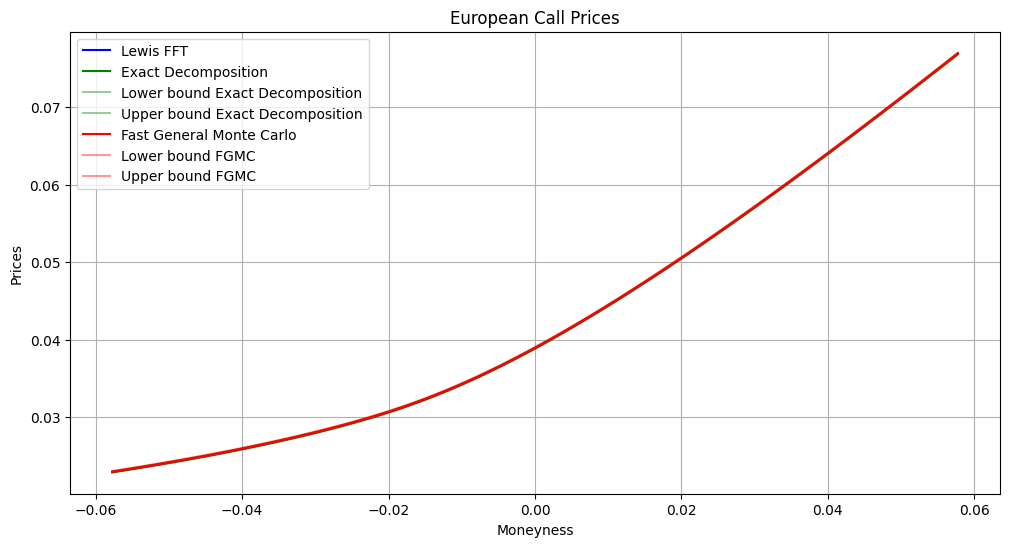

In [76]:
plot_title = "European Call Prices"
ExtraTools.plotPrices(moneyness, pricesLewis, prices_ED, conf_int_ED, prices_FM, conf_int_FM, plot_title)

### OU-TS Finite Activity

In [77]:
# Quantities of interest
T=1/12
M_fft = 16
S0 = 1
r = 0
alpha=-1
scale=1
moneyness = np.linspace(-0.2, 0.2, 10) * np.sqrt(T)

#### Prices with Lewis formula

In [78]:
pricesLewis = Pricing.price_european_lewis_fft(S0, b, alpha, beta_p, beta_n, c_p, c_n, gamma_c, T, moneyness, r, flag_OU_TS_FA, M_fft)

#### Prices exact decomposition

In [79]:
prices_ED, SD_ED, conf_int_ED = Pricing.priceEuropean(x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, M_fft, Nsim, r, S0, moneyness, scale, flag_OU_TS_FA, flag_ED)

#### Prices with Fast General Monte Carlo

In [80]:
prices_FM, SD_FM, conf_int_FM = Pricing.priceEuropean(x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, M_fft, Nsim, r, S0, moneyness, scale, flag_OU_TS_FA, flag_FGMC)

#### Error computation

In [81]:
normInf_ED, RMSE_ED, MAPE_ED = ExtraTools.metricsComputation(pricesLewis, prices_ED)
print("Norm infinitity", normInf_ED)
print("Root Mean Square Error", RMSE_ED)
print("Mean Absolute Percentage Error", MAPE_ED)
normInf_FM, RMSE_FM, MAPE_FM = ExtraTools.metricsComputation(pricesLewis, prices_FM)
print("Norm infinitity", normInf_ED)
print("Root Mean Square Error", RMSE_ED)
print("Mean Absolute Percentage Error", MAPE_ED)

Norm infinitity 6.446977727999487e-05
Root Mean Square Error 5.870904258586025e-05
Mean Absolute Percentage Error 0.3772838519504536
Norm infinitity 6.446977727999487e-05
Root Mean Square Error 5.870904258586025e-05
Mean Absolute Percentage Error 0.3772838519504536


#### Plot

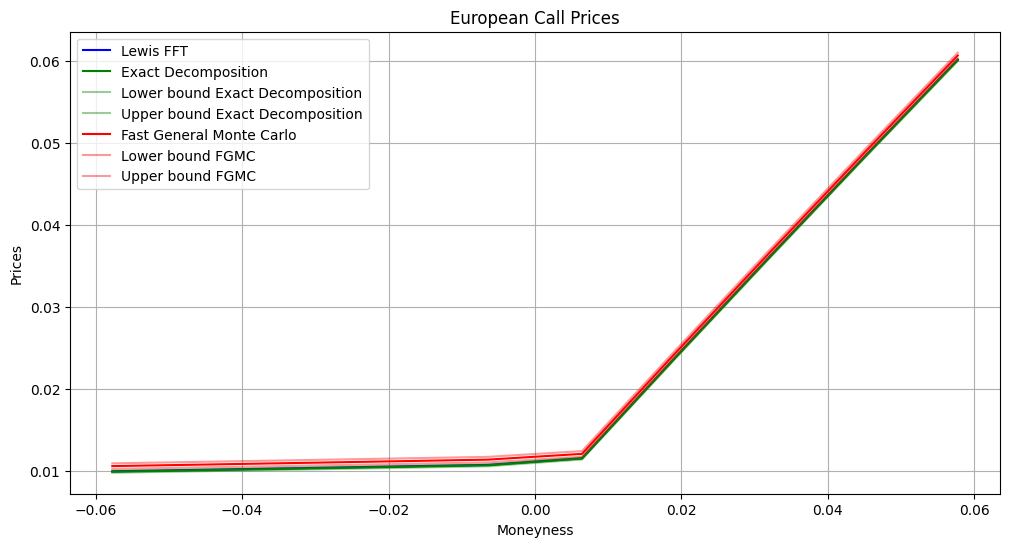

In [82]:
plot_title='European Call Prices'
ExtraTools.plotPrices(moneyness, pricesLewis, prices_ED, conf_int_ED, prices_FM, conf_int_FM, plot_title)

### TS-OU Finite Variation

In [83]:
# Quantities of interest
T=1/12
M_fft = 21
S0 = 1
r = 0
alpha=0.5
scale=1
moneyness = np.linspace(-0.2, 0.2, 100) * np.sqrt(T)

#### Prices with Lewis formula

In [84]:
pricesLewis = Pricing.price_european_lewis_fft(S0, b, alpha, beta_p, beta_n, c_p, c_n, gamma_c, T, moneyness, r, flag_TS_OU, M_fft)

#### Prices exact decomposition

In [85]:
prices_ED, SD_ED, conf_int_ED = Pricing.priceEuropean(x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, M_fft, Nsim, r, S0, moneyness, scale, flag_TS_OU, flag_ED)

#### Prices with Fast General Monte Carlo

In [86]:
prices_FM, SD_FM, conf_int_FM = Pricing.priceEuropean(x0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, M_fft, Nsim, r, S0, moneyness, scale, flag_TS_OU, flag_FGMC)

Error computation

In [87]:
normInf_ED, RMSE_ED, MAPE_ED = ExtraTools.metricsComputation(pricesLewis, prices_ED)
print("Norm infinitity", normInf_ED)
print("Root Mean Square Error", RMSE_ED)
print("Mean Absolute Percentage Error", MAPE_ED)
normInf_FM, RMSE_FM, MAPE_FM = ExtraTools.metricsComputation(pricesLewis, prices_FM)
print("Norm infinitity", normInf_ED)
print("Root Mean Square Error", RMSE_ED)
print("Mean Absolute Percentage Error", MAPE_ED)

Norm infinitity 2.6500899420279188e-05
Root Mean Square Error 2.4862698492731557e-05
Mean Absolute Percentage Error 0.3223690685366232
Norm infinitity 2.6500899420279188e-05
Root Mean Square Error 2.4862698492731557e-05
Mean Absolute Percentage Error 0.3223690685366232


#### Plot

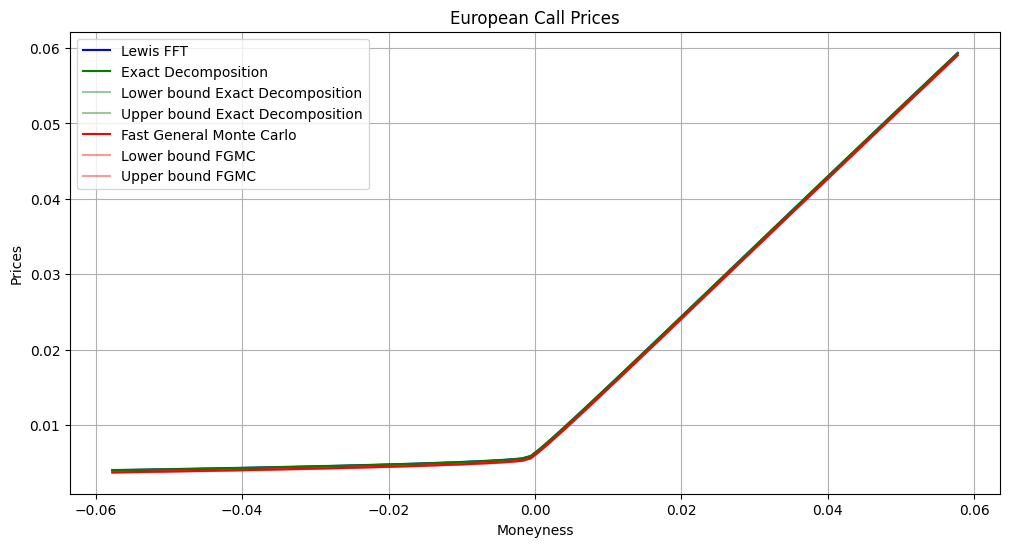

In [88]:
plot_title='European Call Prices'
ExtraTools.plotPrices(moneyness, pricesLewis, prices_ED, conf_int_ED, prices_FM, conf_int_FM, plot_title)

## 3b) Energy derivative pricing - AMERICAN CALL

### OU-TS Finite Variation

In [89]:
# Define parameters
T=1
r = 0
S0=1
moneyness = np.linspace(-0.2, 0.2, 5) * np.sqrt(T)
K = np.exp(r * T) * np.exp(-moneyness)
M_fft = 16
scale = 1
M = 12
Nsim=1000000

#### OU-TS Finite Variation model parameters

In [90]:
alpha = 0.5

#### Exact Decomposition

In [91]:
prices_ED, conf_intervals_ED = Pricing.priceAmerican(x0, S0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, M_fft, Nsim, K, r, scale, flag_OU_TS_FV, flag_ED)

#### Fast General MC

In [92]:
prices_FM, conf_intervals_FM = Pricing.priceAmerican(x0, S0, alpha, b, beta_p, beta_n, c_p, c_n, gamma_c, T, M, M_fft, Nsim, K, r, scale, flag_OU_TS_FV, flag_FGMC)

#### Prices an European call with Lewis formula in order to make a comparison

In [93]:
pricesLewis = Pricing.price_european_lewis_fft(S0, b, alpha, beta_p, beta_n, c_p, c_n, gamma_c, T, moneyness, r, flag_OU_TS_FV, M_fft)

#### Plot

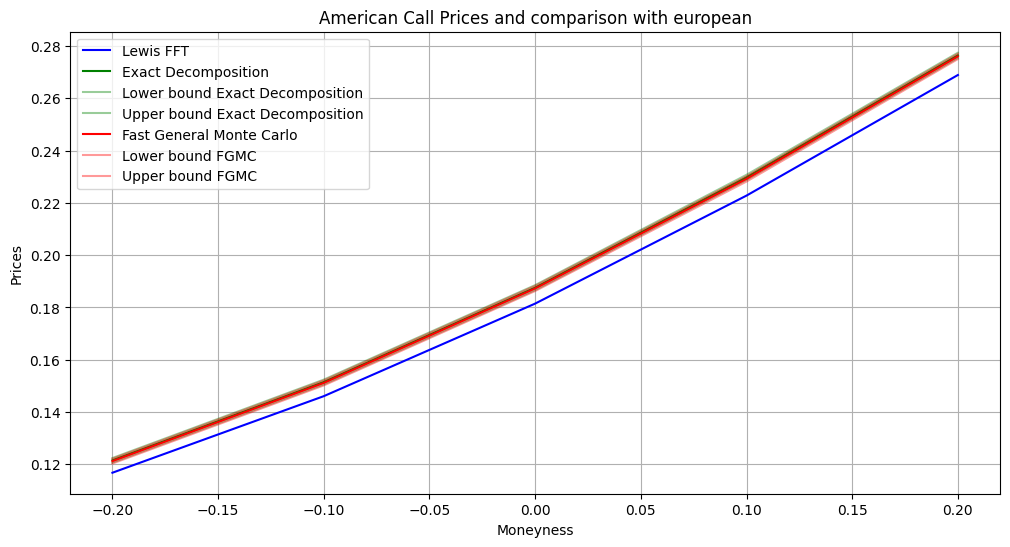

In [94]:
plot_title = "American Call Prices and comparison with european"
ExtraTools.plotPrices(moneyness, pricesLewis, prices_ED, conf_intervals_ED, prices_FM, conf_intervals_FM, plot_title)